
========== Naive Bayes Variants ==========

--- Gaussian Naive Bayes ---

--- Test (GaussianNB) ---
Accuracy : 0.8234
Precision: 0.7169
Recall   : 0.9476
F1 Score : 0.8163
Confusion Matrix:
 [[298 107]
 [ 15 271]]


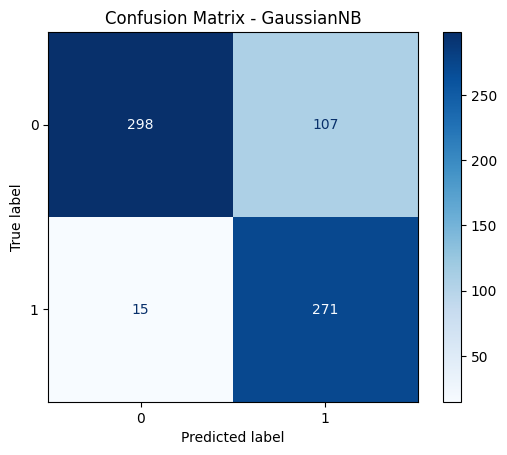

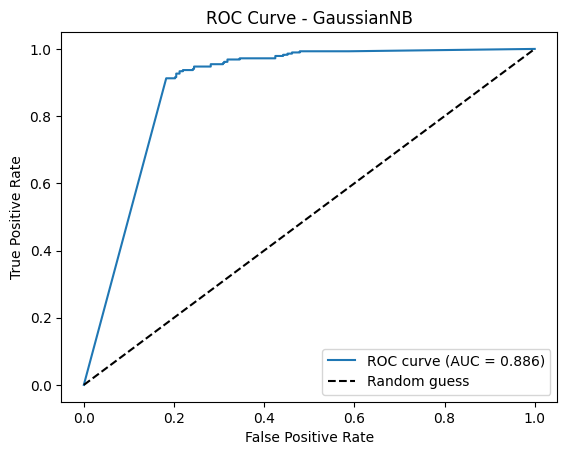


--- Multinomial Naive Bayes ---

--- Test (MultinomialNB) ---
Accuracy : 0.7757
Precision: 0.7569
Recall   : 0.6748
F1 Score : 0.7135
Confusion Matrix:
 [[343  62]
 [ 93 193]]


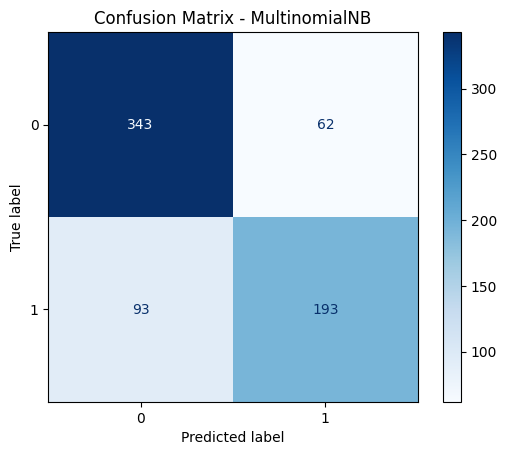

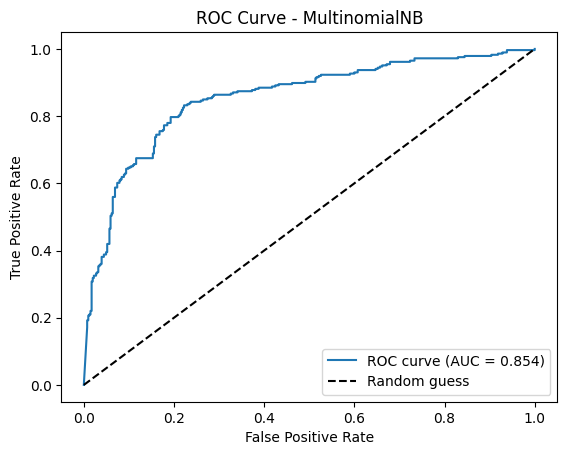


--- Bernoulli Naive Bayes ---

--- Test (BernoulliNB) ---
Accuracy : 0.8886
Precision: 0.9066
Recall   : 0.8147
F1 Score : 0.8582
Confusion Matrix:
 [[381  24]
 [ 53 233]]


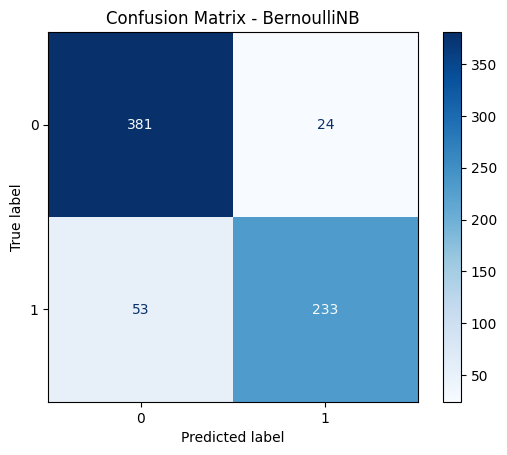

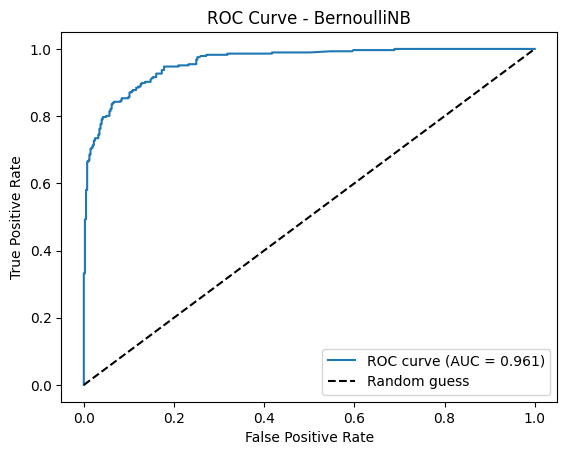


Table 1: Performance Comparison of Naive Bayes Variants
Model           Accuracy   Precision  Recall     F1 Score  
GaussianNB      0.8234     0.7169     0.9476     0.8163    
MultinomialNB   0.7757     0.7569     0.6748     0.7135    
BernoulliNB     0.8886     0.9066     0.8147     0.8582    

========== KNN: Varying k ==========

--- Test (k=1) ---
Accuracy : 0.8871
Precision: 0.8611
Recall   : 0.8671
F1 Score : 0.8641
Confusion Matrix:
 [[365  40]
 [ 38 248]]


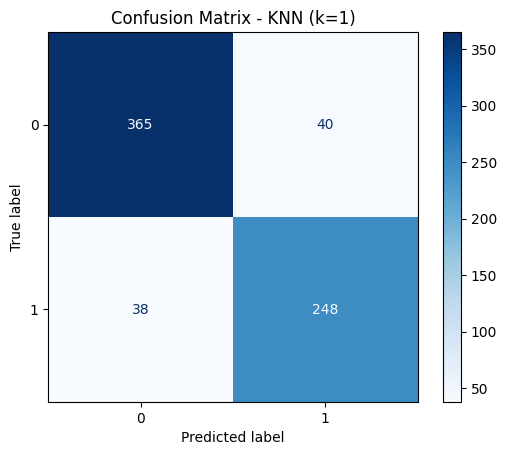

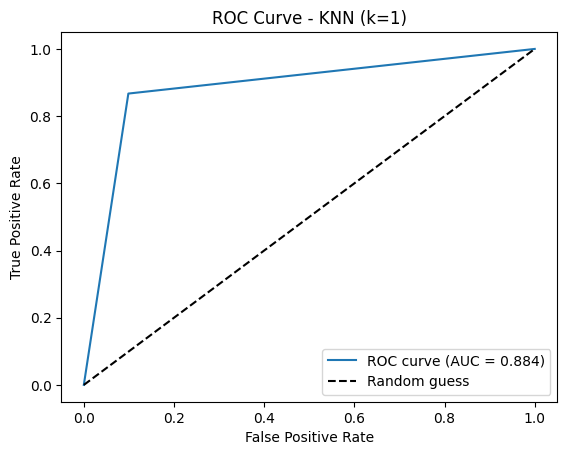


--- Test (k=3) ---
Accuracy : 0.8929
Precision: 0.8786
Recall   : 0.8601
F1 Score : 0.8693
Confusion Matrix:
 [[371  34]
 [ 40 246]]


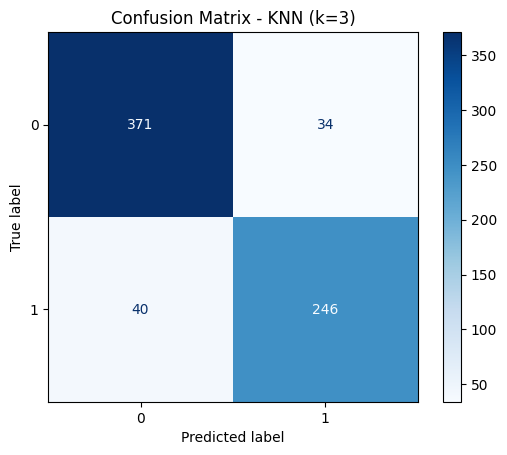

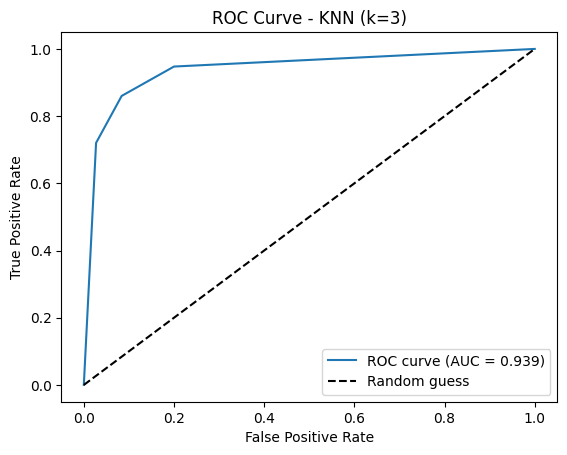


--- Test (k=5) ---
Accuracy : 0.9030
Precision: 0.8925
Recall   : 0.8706
F1 Score : 0.8814
Confusion Matrix:
 [[375  30]
 [ 37 249]]


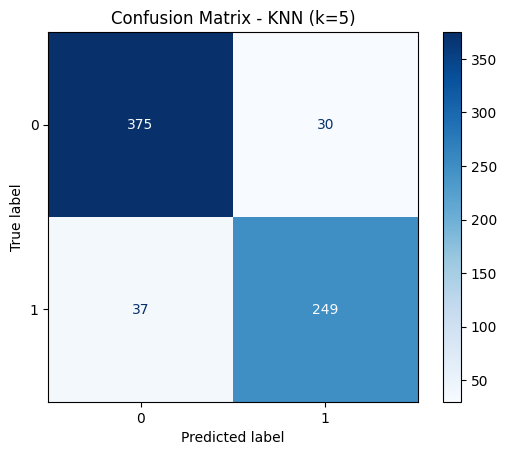

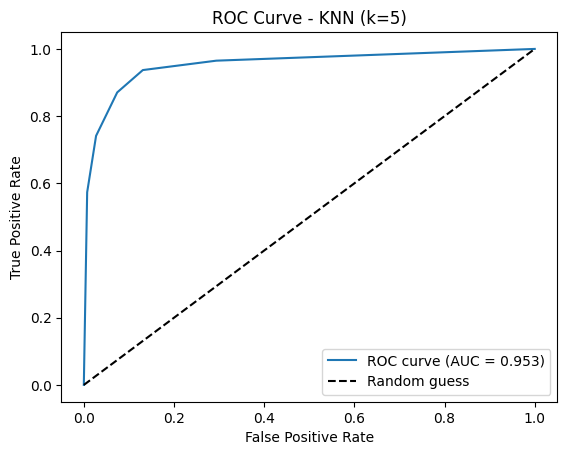


--- Test (k=7) ---
Accuracy : 0.9030
Precision: 0.9011
Recall   : 0.8601
F1 Score : 0.8801
Confusion Matrix:
 [[378  27]
 [ 40 246]]


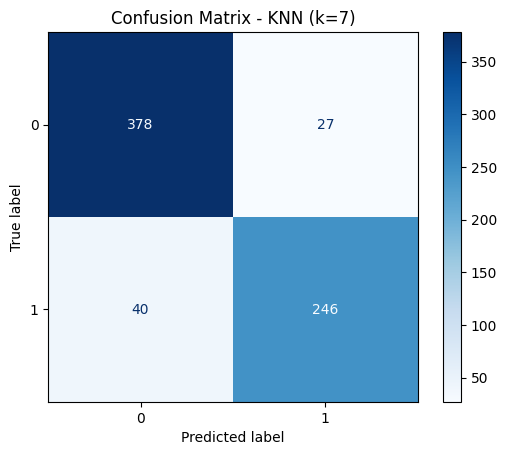

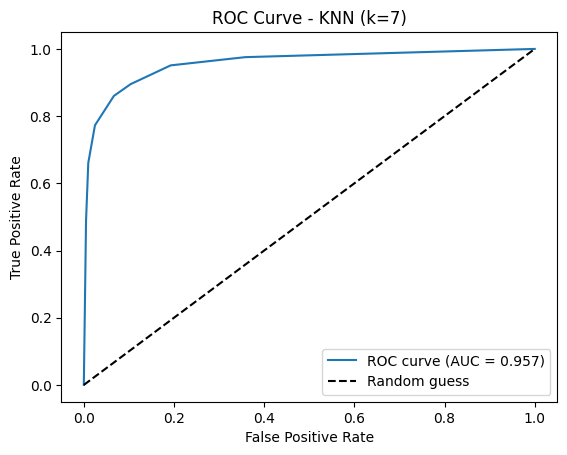


Table 2: KNN Performance for Different k Values
k   Accuracy   Precision  Recall     F1 Score  
1   0.8871     0.8611     0.8671     0.8641    
3   0.8929     0.8786     0.8601     0.8693    
5   0.9030     0.8925     0.8706     0.8814    
7   0.9030     0.9011     0.8601     0.8801    

========== KNN: KDTree vs BallTree ==========

--- Test (kd_tree) ---
Accuracy : 0.9030
Precision: 0.8925
Recall   : 0.8706
F1 Score : 0.8814
Confusion Matrix:
 [[375  30]
 [ 37 249]]


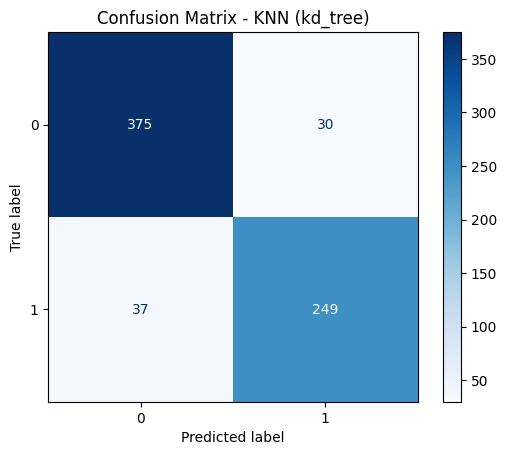

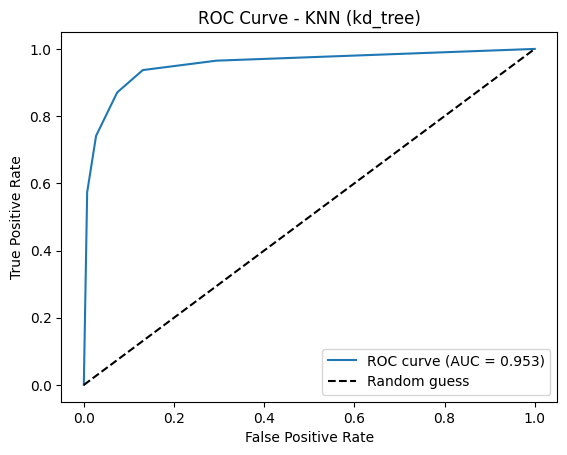


--- Test (ball_tree) ---
Accuracy : 0.9030
Precision: 0.8925
Recall   : 0.8706
F1 Score : 0.8814
Confusion Matrix:
 [[375  30]
 [ 37 249]]


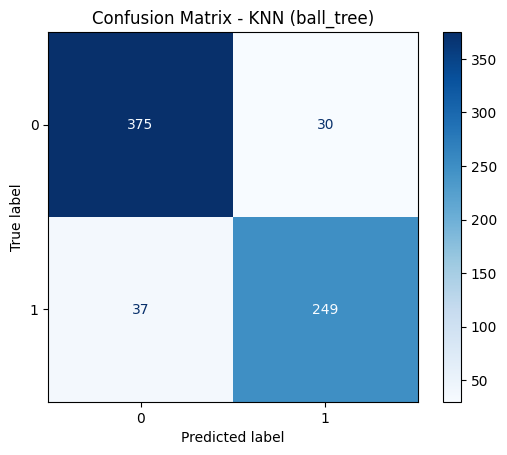

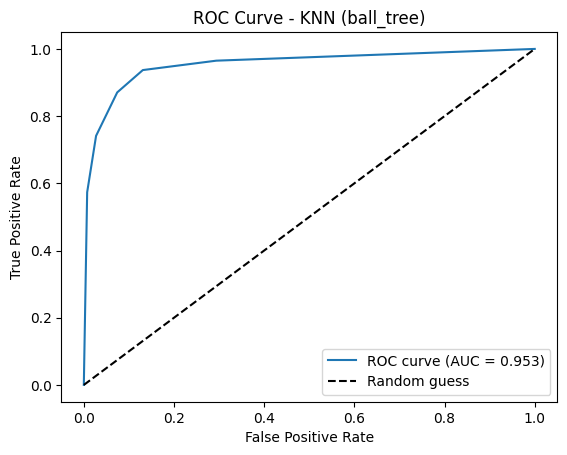


Table 3: KNN Comparison: KDTree vs BallTree
Algorithm  Accuracy   Precision  Recall     F1 Score   Training Time (s)
kd_tree    0.9030     0.8925     0.8706     0.8814     0.1899         
ball_tree  0.9030     0.8925     0.8706     0.8814     0.1826         


In [ ]:
# ----------------------
# 1. Imports and Dataset
# ----------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('spambase_csv.csv')

# ---------------------
# 2. Handling Missing Values
# ---------------------
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode()[0])

for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].mean())

# ---------------------
# 3. Encoding and Splitting
# ---------------------
target_col = 'class'  # column to predict
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scaling (for GaussianNB and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------
# 4. Train-Validation-Test Split
# ---------------------
# Scaled data for GaussianNB and KNN
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Unscaled data for MultinomialNB and BernoulliNB
X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_temp_raw, y_temp_raw, test_size=0.5, random_state=42)

# ---------------------
# 5. Evaluation Function
# ---------------------
def evaluate_classifier(model, X_data, y_true, name="Set"):
    y_pred = model.predict(X_data)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    return acc, prec, rec, f1, y_pred

# ---------------------
# 6. Function to plot confusion matrix
# ---------------------
def plot_confusion_matrix(y_true, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    plt.title(title)
    plt.show()

# ---------------------
# 7. Function to plot ROC curve
# ---------------------
def plot_roc_curve(model, X_test, y_test, title):
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        print(f"Model {title} does not support probability estimates for ROC.")
        return

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# ---------------------
# 8. Naive Bayes Models
# ---------------------
print("\n========== Naive Bayes Variants ==========")
nb_results = []

print("\n--- Gaussian Naive Bayes ---")
gnb = GaussianNB()
gnb.fit(X_train, y_train)
acc, prec, rec, f1, y_pred_gnb = evaluate_classifier(gnb, X_test, y_test, "Test (GaussianNB)")
nb_results.append(('GaussianNB', acc, prec, rec, f1))
plot_confusion_matrix(y_test, y_pred_gnb, "Confusion Matrix - GaussianNB")
plot_roc_curve(gnb, X_test, y_test, "ROC Curve - GaussianNB")

print("\n--- Multinomial Naive Bayes ---")
mnb = MultinomialNB()
mnb.fit(X_train_raw, y_train_raw)
acc, prec, rec, f1, y_pred_mnb = evaluate_classifier(mnb, X_test_raw, y_test_raw, "Test (MultinomialNB)")
nb_results.append(('MultinomialNB', acc, prec, rec, f1))
plot_confusion_matrix(y_test_raw, y_pred_mnb, "Confusion Matrix - MultinomialNB")
plot_roc_curve(mnb, X_test_raw, y_test_raw, "ROC Curve - MultinomialNB")

print("\n--- Bernoulli Naive Bayes ---")
bnb = BernoulliNB()
bnb.fit(X_train_raw, y_train_raw)
acc, prec, rec, f1, y_pred_bnb = evaluate_classifier(bnb, X_test_raw, y_test_raw, "Test (BernoulliNB)")
nb_results.append(('BernoulliNB', acc, prec, rec, f1))
plot_confusion_matrix(y_test_raw, y_pred_bnb, "Confusion Matrix - BernoulliNB")
plot_roc_curve(bnb, X_test_raw, y_test_raw, "ROC Curve - BernoulliNB")

# Display comparison table
print("\nTable 1: Performance Comparison of Naive Bayes Variants")
print("{:<15} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Precision", "Recall", "F1 Score"))
for res in nb_results:
    print("{:<15} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(*res))

# ---------------------
# 9. KNN for Different k
# ---------------------
print("\n========== KNN: Varying k ==========")
knn_results = []

for k in [1, 3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc, prec, rec, f1, y_pred_knn = evaluate_classifier(knn, X_test, y_test, f"Test (k={k})")
    knn_results.append((k, acc, prec, rec, f1))
    plot_confusion_matrix(y_test, y_pred_knn, f"Confusion Matrix - KNN (k={k})")
    plot_roc_curve(knn, X_test, y_test, f"ROC Curve - KNN (k={k})")

# Display comparison table
print("\nTable 2: KNN Performance for Different k Values")
print("{:<3} {:<10} {:<10} {:<10} {:<10}".format("k", "Accuracy", "Precision", "Recall", "F1 Score"))
for res in knn_results:
    print("{:<3} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(*res))

# ---------------------
# 10. KNN with KDTree and BallTree
# ---------------------
print("\n========== KNN: KDTree vs BallTree ==========")
knn_tree_results = []

for algo in ['kd_tree', 'ball_tree']:
    knn_tree = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn_tree.fit(X_train, y_train)

    import time
    start = time.time()
    acc, prec, rec, f1, y_pred_tree = evaluate_classifier(knn_tree, X_test, y_test, f"Test ({algo})")
    end = time.time()
    duration = end - start

    knn_tree_results.append((algo, acc, prec, rec, f1, duration))

    plot_confusion_matrix(y_test, y_pred_tree, f"Confusion Matrix - KNN ({algo})")
    plot_roc_curve(knn_tree, X_test, y_test, f"ROC Curve - KNN ({algo})")

# Display comparison table
print("\nTable 3: KNN Comparison: KDTree vs BallTree")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<15}".format("Algorithm", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"))
for res in knn_tree_results:
    print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f} {:<15.4f}".format(*res))
